# 授業等の動画ファイルからスライドを画像で取得

In [3]:
import os
import cv2
import glob
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt

### 動画の指定

In [4]:
pass_mv = '動画ファイル'
pass_img_save='画像保存先ファイル'

In [5]:
mvlist=glob.glob(pass_mv + '*.mp4')
mvlist

[]

In [15]:
movie = mvlist[0]
mv= cv2.VideoCapture(movie)#動画の読み込み

In [16]:
print(mv.get(cv2.CAP_PROP_FRAME_WIDTH))
print(mv.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(mv.get(cv2.CAP_PROP_FPS))

1920.0
1080.0
29.06547984617114


### 検出対象の大きさ、画像の大きさ指定

画面全体の　**n分の1** の大きさ

In [6]:
size=(960, 540) # 画像の大きさ

n=2

move_size_x = int(size[0] / n)
move_size_y = int(size[1] / n)
move_size=(move_size_x,move_size_y)

print(move_size)


(480, 270)


 ### スライド検出

In [7]:
frame_count =int(mv.get(cv2.CAP_PROP_FRAME_COUNT))#動画を画像にした総枚数を調べる
frame_count

21874

In [32]:
N=30 # フレームN個枚飛ばし
diff=[]
movie = mvlist[2]
mv= cv2.VideoCapture(movie)
frame_count =int(mv.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
for i in range(0, frame_count):#総枚数
    ch,frame=mv.read()#1フレーム(画像)取り出す
    if ch==True:#取り出せたかどうかの確認
        if i % N == 0:
            frame=cv2.resize(frame,size)
            if i==0:
                bfmv=frame
            dif=frame-bfmv
            bfmv=frame
            cv2.imshow('movie', frame)#表示
            k=cv2.waitKey(1) #1ミリ秒 wait
            diff.append(np.sum(dif))
        
    if i%1000==0:
        print(i)
 

    if k==27: #ESCキーを押したとき終了
        break

mv.release()
cv2.destroyAllWindows()

124331
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000


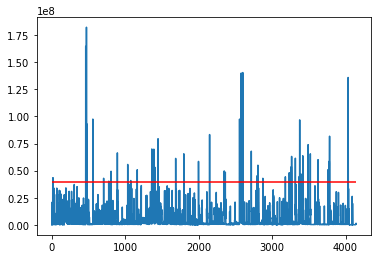

In [41]:
plt.plot(diff)
plt.hlines(y = 0.4*(10**8), xmin = 0, xmax = len(diff),color='r')

In [44]:
len(dif[diff > 0.4 * (10**8)])

TypeError: '>' not supported between instances of 'list' and 'float'

In [43]:
change_page = 0.4*(10**8) # 閾値確認

N=30 # フレームN個枚飛ばし
mv= cv2.VideoCapture(movie)
frame_count =int(mv.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
for i in range(0, frame_count):#総枚数
    ch,frame=mv.read()#1フレーム(画像)取り出す
    if ch==True:#取り出せたかどうかの確認
        if i % N == 0:
            frame=cv2.resize(frame,size)
            if i==0:
                bfmv=frame
                cv2.imwrite(pass_img_save + '3-' + str(i) + '.jpg', frame)
            dif=np.sum(frame-bfmv)
            bfmv=frame
            cv2.imshow('movie', frame)#表示
            k=cv2.waitKey(1) #1ミリ秒 wait
            if dif >= change_page:
                print(1)
                cv2.imwrite(pass_img_save + '3-' + str(i) + '.jpg', frame)
        
    if i%1000==0:
        print(i)
 

    if k==27: #ESCキーを押したとき終了
        break

mv.release()
cv2.destroyAllWindows()

124331
0
1
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
1
14000
1
1
1
1
15000
16000
1
17000
18000
19000
20000
21000
1
22000
23000
1
1
24000
1
25000
26000
1
27000
28000
29000
30000
31000
1
32000
1
33000
34000
1
35000
36000
37000
38000
39000
40000
1
41000
1
42000
1
1
1
43000
1
44000
45000
46000
47000
48000
49000
50000
1
51000
52000
53000
1
54000
55000
56000
57000
58000
59000
1
60000
61000
62000
63000
64000
1
65000
66000
67000
68000
69000
70000
1
1
71000
72000
73000
74000
75000
76000
1
1
1
1
1
77000
1
1
1
78000
1
79000
80000
81000
1
82000
83000
1
84000
1
85000
86000
1
87000
88000
89000
90000
91000
92000
93000
94000
95000
1
96000
97000
1
1
1
1
1
1
1
98000
99000
1
100000
101000
1
1
1
102000
1
1
103000
104000
1
1
105000
1
106000
107000
108000
1
109000
110000
111000
112000
1
1
1
113000
1
1
1
1
1
114000
115000
116000
117000
118000
119000
120000
1
121000
1
1
1
1
122000
123000
124000


In [ ]:
mvlist